# ***PART2***

**Imports**

In [1]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

In [6]:
fold = [np.loadtxt('CCPP/fold1.txt')
        ,np.loadtxt('CCPP/fold2.txt')
        ,np.loadtxt('CCPP/fold3.txt')
        ,np.loadtxt('CCPP/fold4.txt')
        ,np.loadtxt('CCPP/fold5.txt')]
fold = np.array(fold)

**Five Fold Generator**

In [7]:
def fold_gen(j):
    if j!=0:
      train_1 = np.concatenate((fold[:j]), axis=0)
    if j!=4:
      train_2 = np.concatenate((fold[j+1:]), axis=0)
    if j==0:
      trn = train_2
    elif j==4:
      trn = train_1
    else:
      trn = np.concatenate((train_1,train_2), axis=0)
    tst = fold[j]
    return trn, tst

**Ws Generator**

In [8]:
def Ws_Gen(P, X, t):
  Xmat = []
  Tmat = []
  if (X.ndim == 1):
    X = X.reshape(-1, 1)
  N = len(X)
  numfeatures = len(X[0])
  for i in range(0,N):
    Xmat_row = []
    for j in range(0,numfeatures):
      for k in range(P, 0, -1):
        Xmat_row.append(X[i][j] ** k)
    Xmat_row.append(1)
    Xmat.append(Xmat_row)
  Xmat = np.array(Xmat)
  Tmat = np.array(t)
  Ws = (np.linalg.inv(Xmat.transpose() @ Xmat) @ Xmat.transpose()) @ Tmat
  return Ws


**2. Using 5-crossfold validation, find the best order for your LS regression
model (linear, quadratic, etc...) for only the Exhaust Vacuum (V) as the
input feature. Plot both training and validation ERMS (Y axis) versus
order of the regression polynomial model (X axis), showing the best
chosen polynomial order. [1%]**

**1D ERMS Calculator**

In [9]:
def ERMS_Calculator_1D(W, X, Y):
  err_array = []
  predicted_P = []
  N = len(X)
  for i in range(N):
    pred = 0
    for count,hi in enumerate(W):
      pred = pred + hi*X[i]**count
    predicted_P.append(pred)
  err_array = (predicted_P - Y)**2
  return  math.sqrt(np.sum(err_array)/N)

In [10]:
def ERMS_Calculator_mD(W, X, Y):
  err_array = []
  predicted_P = []
  if (X.ndim == 1):
    X = X.reshape(-1, 1)
  N = len(X)
  numfeatures = len(X[0])
  for i in range(N):
    pred = 0
    for count,hi in enumerate(W[:-1]):
      pred = pred + hi*X[i][count]
    pred = pred + W[numfeatures]
    predicted_P.append(pred)
  err_array = (predicted_P - Y)**2
  return  math.sqrt(np.sum(err_array)/N)

In [11]:
N = 30
E_avg_array_train = []
E_avg_array_test = []
powerr = [0, 1, 2, 3, 4, 5, 6, 7]
for pow in powerr:
  E_train = []
  E_test = []
  Ypred = 0
  for i in range (0, 5):
    train, test = fold_gen(i)
    V_train = train[:N,1]
    P_train = train[:N,4]
    V_test = test[:N,1]
    P_test = test[:N,4]
    
    w = Ws_Gen(pow, V_train, P_train)
    E_train.append(ERMS_Calculator_1D(np.flip(w), V_train, P_train))
    E_test.append(ERMS_Calculator_1D(np.flip(w), V_test, P_test))
  E_avg_train = sum(E_train)/5
  E_avg_array_train.append(E_avg_train)
  E_avg_test = sum(E_test)/5
  E_avg_array_test.append(E_avg_test)


Text(0, 0.5, 'Erms')

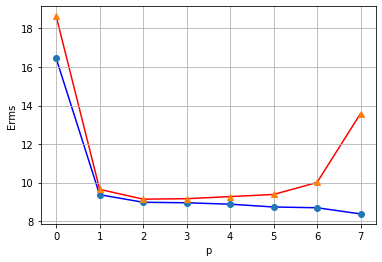

In [12]:
E_avg_array_train = np.array(E_avg_array_train)
E_avg_array_test = np.array(E_avg_array_test)
powerr = np.array(powerr)
plt.plot(powerr, E_avg_array_train, 'o')
plt.plot(powerr,E_avg_array_train,color='b',zorder=1)
plt.plot(powerr, E_avg_array_test, '^')
plt.plot(powerr,E_avg_array_test,color='r',zorder=1)
plt.grid()
plt.xlabel('p')
plt.ylabel('Erms')

The best choosen polynomial oder is **4** or **5** sense the validation set Erms did not increase significantly

**3. Using 5-crossfold validation, find the best subset of the available 4
features: Temperature (AT), Pressure (AP), Relative Humidity (RH) and
Exhaust Vacuum (V) for only the Linear LS model. Plot both training
and validation ERMS (Y axis) versus different combinations of the 4
features, showing the best combination. [1%]**

In [13]:
def sub_lists (l): 
    base = []   
    lists = [base] 
    for i in range(len(l)): 
        orig = lists[:] 
        new = l[i] 
        for j in range(len(lists)): 
            lists[j] = lists[j] + [new] 
        lists = orig + lists 
          
    return lists 

In [14]:
l1 = [0, 1, 2, 3] 
l1 = sub_lists(l1)
l1.pop(0)

[]

In [15]:
E_avg_array_train = []
E_avg_array_test = []
for j in l1:
  N = 13
  E_train = []
  E_test = []
  Ypred = 0
  for i in range (0, 5):
    train, test = fold_gen(i)
    V_train = train[:N,j]
    P_train = train[:N,4]
    V_test = test[:N,j]
    P_test = test[:N,4]
    w = Ws_Gen(1, V_train, P_train)
    E_train.append(ERMS_Calculator_mD(w, V_train, P_train))
    E_test.append(ERMS_Calculator_mD(w, V_test, P_test))
  E_avg_train = sum(E_train)/5
  E_avg_array_train.append(E_avg_train)
  E_avg_test = sum(E_test)/5
  E_avg_array_test.append(E_avg_test)

In [16]:
string_comb = ['[0]', '[1]', '[0, 1]', '[2]', '[0, 2]', '[1, 2]', '[0, 1, 2]', '[3]', '[0, 3]', '[1, 3]', '[0, 1, 3]', '[2, 3]', '[0, 2, 3]', '[1, 2, 3]', '[0, 1, 2, 3]']
string_comb = np.array(string_comb)

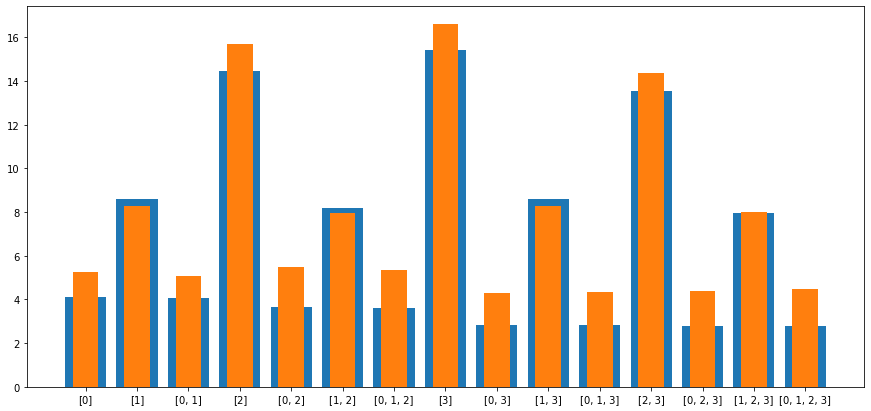

In [17]:
E_avg_array_train = np.array(E_avg_array_train)
E_avg_array_test = np.array(E_avg_array_test)
# Figure Size 
fig = plt.figure(figsize =(15, 7)) 
# Horizontal Bar Plot 
plt.bar(string_comb, E_avg_array_train) 
plt.bar(string_comb, E_avg_array_test, width = 0.5) 
# Show Plot 
plt.show()

The graph plotted shows that any 1 feature is used as a predicter solely, it does not give good results. Generally, when the number of features is increased the error is reduced. The least is yeilded when the 4 features are used. Also, The test set generally follows the same pattern as that created by the training set. 

**4. Repeat 2 above for all features combined as input rather than only the
Exhaust Vacum (V) [1%]**

In [18]:
from itertools import combinations_with_replacement  
# Get all combinations of [1, 2, 3] and length 2
def combinations_generator(p, A):
  all_combinations = []
  for j in range(1,p+1):
    comb = combinations_with_replacement(A, j) 
    # Print the obtained combinations 
    for i in list(comb): 
        i = np.array(i)
        all_combinations.append(i)
  return all_combinations

In [19]:
def Ws_Gen_4D_High_Order(P, X, t):
  comb = combinations_generator(P, [0, 1, 2, 3])
  Xmat = []
  Tmat = []
  N = len(X)
  numfeatures = 4
  for i in range(0,N):
    Xmat_row = []
    for j in comb:
      w = 1
      for k in j:
        w = w * X[i][k]
      Xmat_row.append(w)
    Xmat_row.append(1)
    Xmat.append(Xmat_row)
  Xmat = np.array(Xmat)
  Tmat = np.array(t)
  Ws = (np.linalg.inv(Xmat.transpose() @ Xmat) @ Xmat.transpose()) @ Tmat
  return Ws


In [20]:
def ERMS_Calculator_4D_high_order(P, W, X, Y):
  comb = combinations_generator(P, [0, 1, 2, 3])
  Xmat = []
  Tmat = []
  err_array = []
  predicted_P = []
  N = len(X)
  numfeatures = 4
  for i in range(N):
    pred = 0
    for count,hi in enumerate(W[:-1]):
      num_x = 1
      for j in comb[count]:
        num_x = num_x * X[i][j]
      pred = pred + hi*num_x
    pred = pred + W[len(W)-1]
    predicted_P.append(pred)
  err_array = (predicted_P - Y)**2
  return  math.sqrt(np.sum(err_array)/N)

In [21]:
N = 30
E_avg_array_train = []
E_avg_array_test = []
powerr = [0, 1, 2]
for pow in powerr:
  E_train = []
  E_test = []
  Ypred = 0
  for i in range (0, 5):
    train, test = fold_gen(i)
    V_train = train[:N,[0,1,2,3]]
    P_train = train[:N,4]
    V_test = test[:N,[0,1,2,3]]
    P_test = test[:N,4]
    
    w = Ws_Gen_4D_High_Order(pow, V_train, P_train)
    E_train.append(ERMS_Calculator_4D_high_order(pow,w, V_train, P_train))
    E_test.append(ERMS_Calculator_4D_high_order(pow,w, V_test, P_test))
  E_avg_train = sum(E_train)/5
  E_avg_array_train.append(E_avg_train)
  E_avg_test = sum(E_test)/5
  E_avg_array_test.append(E_avg_test)


Text(0, 0.5, 'Erms')

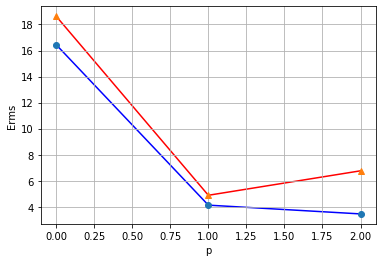

In [23]:
E_avg_array_train = np.array(E_avg_array_train)
E_avg_array_test = np.array(E_avg_array_test)
powerr = np.array(powerr)
plt.plot(powerr, E_avg_array_train, 'o')
plt.plot(powerr,E_avg_array_train,color='b',zorder=1)
plt.plot(powerr, E_avg_array_test, '^')
plt.plot(powerr,E_avg_array_test,color='r',zorder=1)
plt.grid()
plt.xlabel('p')
plt.ylabel('Erms')